In [1]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace
from pylab import scatter, show, title, xlabel, ylabel, plot, contour
import pandas as pd
import numpy as np

## Data Visualization

In [2]:
iris= pd.read_csv('Iris.csv',names=['Id','Sepal-length (cm)','Sepal-width (cm)','Petal-length (cm)','Petal-width (cm)'])

In [3]:
iris

Id  Sepal-length (cm)  Sepal-width (cm)  Petal-length (cm)  \
0      1                5.1               3.5                1.4   
1      2                4.9               3.0                1.4   
2      3                4.7               3.2                1.3   
3      4                4.6               3.1                1.5   
4      5                5.0               3.6                1.4   
5      6                5.4               3.9                1.7   
6      7                4.6               3.4                1.4   
7      8                5.0               3.4                1.5   
8      9                4.4               2.9                1.4   
9     10                4.9               3.1                1.5   
10    11                5.4               3.7                1.5   
11    12                4.8               3.4                1.6   
12    13                4.8               3.0                1.4   
13    14                4.3               3.0                1.1   
14    15                5.8               4.0                1.2   
15    16                5.7               4.4                1.5   
16    17                5.4               3.9                1.3   
17    18                5.1               3.5                1.4   
18    19                5.7               3.8                1.7   
19    20                5.1               3.8                1.5   
20    21                5.4               3.4                1.7   
21    22                5.1               3.7                1.5   
22    23                4.6               3.6                1.0   
23    24                5.1               3.3                1.7   
24    25                4.8               3.4                1.9   
25    26                5.0               3.0                1.6   
26    27                5.0               3.4                1.6   
27    28                5.2               3.5                1.5   
28    29                5.2               3.4                1.4   
29    30                4.7               3.2                1.6   
..   ...                ...               ...                ...   
120  121                6.9               3.2                5.7   
121  122                5.6               2.8                4.9   
122  123                7.7               2.8                6.7   
123  124                6.3               2.7                4.9   
124  125                6.7               3.3                5.7   
125  126                7.2               3.2                6.0   
126  127                6.2               2.8                4.8   
127  128                6.1               3.0                4.9   
128  129                6.4               2.8                5.6   
129  130                7.2               3.0                5.8   
130  131                7.4               2.8                6.1   
131  132                7.9               3.8                6.4   
132  133                6.4               2.8                5.6   
133  134                6.3               2.8                5.1   
134  135                6.1               2.6                5.6   
135  136                7.7               3.0                6.1   
136  137                6.3               3.4                5.6   
137  138                6.4               3.1                5.5   
138  139                6.0               3.0                4.8   
139  140                6.9               3.1                5.4   
140  141                6.7               3.1                5.6   
141  142                6.9               3.1                5.1   
142  143                5.8               2.7                5.1   
143  144                6.8               3.2                5.9   
144  145                6.7               3.3                5.7   
145  146                6.7               3.0                5.2   
146  147                6.3               2.5                5

In [4]:
data = loadtxt('Iris.txt', delimiter=',')

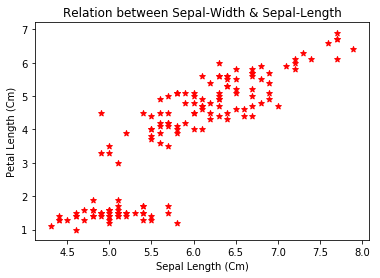

In [5]:
scatter(data[:, 1], data[:, 3], marker='*', c='r')
title('Relation between Sepal-Width & Sepal-Length')
xlabel('Sepal Length (Cm)')
ylabel('Petal Length (Cm)')
show()

In [6]:
X = data[:, 1]
y = data[:, 3]

#number of training samples
m = y.size

#Add a column of ones to X (interception data)
it = ones(shape=(m, 2))
it[:, 1] = X

#Initialize theta parameters
theta = zeros(shape=(2, 1))

#Some gradient descent settings
iterations = 1500
alpha = 0.0545

#Evaluate the linear regression.
def compute_cost(X, y, theta):
    '''
    Compute cost for linear regression
    '''
    #Number of training samples
    m = y.size

    predictions = X.dot(theta).flatten()

    sqErrors = (predictions - y) ** 2

    J = (1.0 / (2 * m)) * sqErrors.sum()

    return J

# Peforming the gradient descent method.
def gradient_descent(X, y, theta, alpha, num_iters):
    '''
    Performs gradient descent to learn theta
    by taking num_items gradient steps with learning
    rate alpha
    '''
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(theta).flatten()

        errors_x1 = (predictions - y) * X[:, 0]
        errors_x2 = (predictions - y) * X[:, 1]

        theta[0][0] = theta[0][0] - alpha * (1.0 / m) * errors_x1.sum()
        theta[1][0] = theta[1][0] - alpha * (1.0 / m) * errors_x2.sum()

        J_history[i, 0] = compute_cost(X, y, theta)

    return theta, J_history

In [7]:
#compute and display initial cost

print(compute_cost(it,y,theta))

theta, J_history = gradient_descent(it, y, theta, alpha, iterations)

#Predict the length of the petal at 7cm and 9cm
prediction1 = array([1, 7]).dot(theta).flatten()
print ('For Sepal length = 7 cm predicted length is %f' % (prediction1))
predictiion2 = array([1, 9]).dot(theta).flatten()
print ('For Sepal length = 9 cm predicted length is %f'% (predictiion2))

#Plot the results
result = it.dot(theta).flatten()
scatter(data[:, 1], data[:, 3], marker='*', c='r')
title('Lin-regression for Sepal-Width & Sepal-Length')
xlabel('Sepal Length (Cm)')
ylabel('Petal Length (Cm)')
plot(data[:, 1], result)
show()

8.61
For Sepal length = 7 cm predicted length is 5.640924
For Sepal length = 9 cm predicted length is 8.845550


## Interpretation 

####  According to the Linear regression, it suggests that the sepal length grows linealy with 
#### with the petal length. At $7$ cm it suggests $5.640924$ cm and at $9$ cm it will be $8.845550$ cm. 